#  yt test

## Check the Interpolation Function of Field from YT

In [21]:
import yt
import numpy as np
import inspect
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from typing import List, Any, Union
from pympler import asizeof

datfile = r'./data/tdm0.dat'
ds = yt.load(datfile)

yt : [WARNING  ] 2024-09-12 16:44:37,854 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-09-12 16:44:37,890 Parameters: current_time              = 0.4
yt : [INFO     ] 2024-09-12 16:44:37,891 Parameters: domain_dimensions         = [48 48 48]
yt : [INFO     ] 2024-09-12 16:44:37,891 Parameters: domain_left_edge          = [-4. -4.  0.]
yt : [INFO     ] 2024-09-12 16:44:37,892 Parameters: domain_right_edge         = [4. 4. 8.]
yt : [INFO     ] 2024-09-12 16:44:37,893 Parameters: cosmological_simulation   = 0


In [22]:
asizeof.asizeof(ds.index.grids[0])

yt : [WARNING  ] 2024-09-12 16:44:38,422 e not found and no parfile passed, can not set thermal_pressure.


315096

In [23]:
ad = ds.all_data()
table_data = np.random.random((64, 64, 64))
interp = yt.utilities.linear_interpolators.TrilinearFieldInterpolator(table_data,
                                    (0.0, 1.0, 0.0, 1.0, 0.0, 1.0),
                                    ["x", "y", "z"],
                                    truncate=True)
field_data = interp(ad)
# the trilinearfieldInterpolator is just a 3rd order interpolation over uniform data, not derivation from amr mesh

In [24]:
64**3

262144

In [25]:
field_data

array([   28782.48493526,    34783.69195835,   -12257.47960087, ...,
       -4727662.61127685, -4846641.64800054, -4965620.68472423])

In [26]:
grad_b1 = ds.add_gradient_fields(("amrvac", "b1"))
grad_b2 = ds.add_gradient_fields(("amrvac", "b2"))
grad_b3 = ds.add_gradient_fields(("amrvac", "b3"))

def _b1s(field, data):
    return 
def _j1(field, data):
    return data['amrvac','b3_gradient_y'] - data['amrvac', 'b2_gradient_z']
def _j2(field, data):
    return data['amrvac','b1_gradient_z'] - data['amrvac', 'b3_gradient_x']
def _j3(field, data):
    return data['amrvac','b2_gradient_x'] - data['amrvac', 'b1_gradient_y']
def _bmag(field, data):
    return np.sqrt(data['amrvac', 'b1']**2 + data['amrvac', 'b2']**2 + data['amrvac', 'b3']**2)
def _jp(field, data):
    return (data['amrvac', 'j1'] * data['amrvac', 'b1'] + data['amrvac', 'j2'] * data['amrvac', 'b2'] + data['amrvac', 'j3'] * data['amrvac', 'b3']) \
            / data['amrvac', 'b_magnitude']

ds.add_field(("amrvac", "j1"), function=_j1, units="code_magnetic/cm", sampling_type="cell", force_override=True)
ds.add_field(("amrvac", "j2"), function=_j2, units="code_magnetic/cm", sampling_type="cell", force_override=True)
ds.add_field(("amrvac", "j3"), function=_j3, units="code_magnetic/cm", sampling_type="cell", force_override=True)
ds.add_field(("amrvac", "b_magnitude"), function=_bmag, units="code_magnetic", sampling_type="cell", force_override=True)
ds.add_field(("amrvac", "jp"), function=_jp, units="code_magnetic/cm", sampling_type="cell", force_override=True)

In [27]:
ds.all_data()._determine_fields('b1')

[('amrvac', 'b1')]

In [28]:
ds.force_periodicity()

In [29]:
fieldname = 'b3'
slice_plot = yt.SlicePlot(ds, 'y', fieldname)

yt : [INFO     ] 2024-09-12 16:44:40,398 xlim = 0.000000 8.000000
yt : [INFO     ] 2024-09-12 16:44:40,400 ylim = -4.000000 4.000000
yt : [INFO     ] 2024-09-12 16:44:40,402 xlim = 0.000000 8.000000
yt : [INFO     ] 2024-09-12 16:44:40,402 ylim = -4.000000 4.000000
yt : [INFO     ] 2024-09-12 16:44:40,407 Making a fixed resolution buffer of (('amrvac', 'b3')) 800 by 800



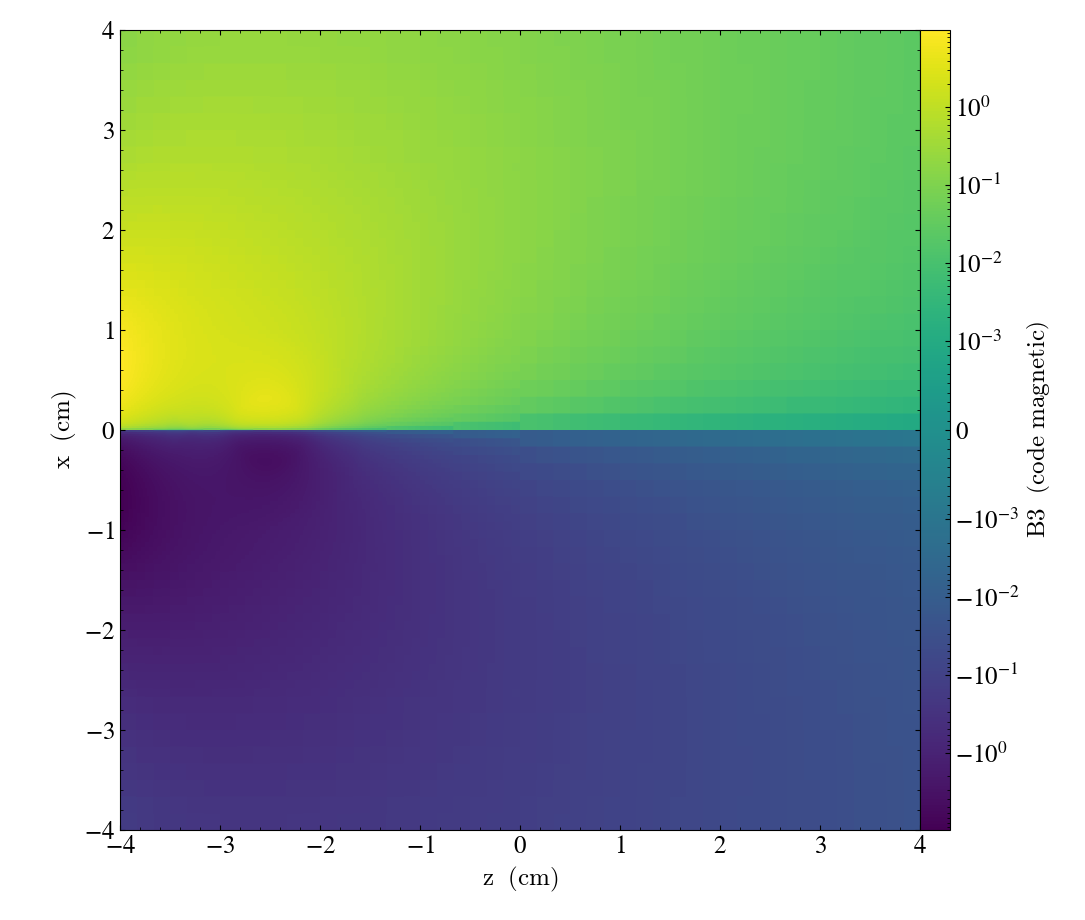

In [30]:
slice_plot.set_cmap(fieldname, 'viridis')
# slice_plot.set_log(fieldname, False)
# slice_plot.set_axes_unit('code_length')

In [31]:
# Define the level of refinement and the bounding box
level = 2
left_edge = ds.domain_left_edge
right_edge = ds.domain_right_edge
dims = ds.domain_dimensions * (2**level)

# Create the covering grid
covering_grid = ds.covering_grid(level, left_edge, dims)


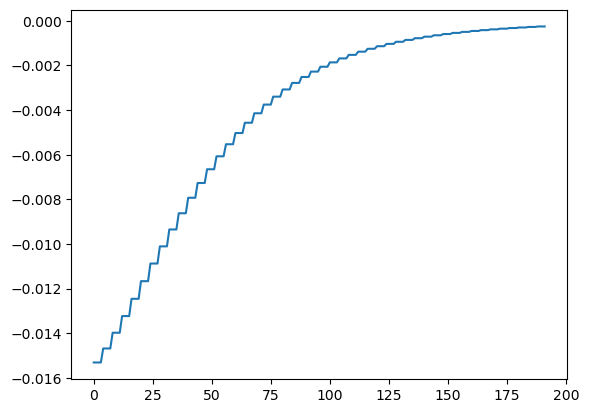

In [32]:
plt.plot(covering_grid['b2'][0,96,:])

In [33]:
region = ds.r[::400*1j, ::400*1j, ::400*1j]

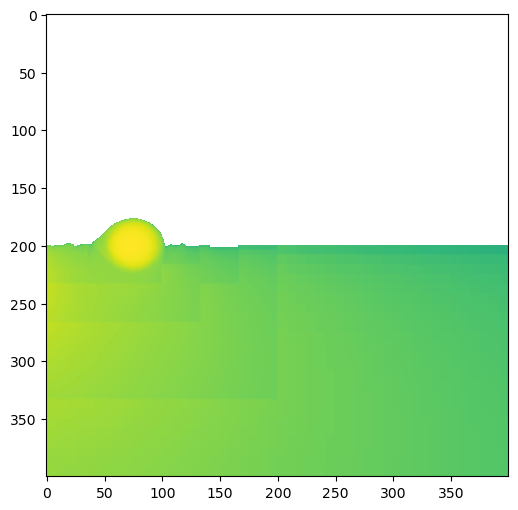

In [34]:
slicey = region['b2'][:,200,:]
plt.figure(figsize=(6,6))
plt.imshow(slicey, norm=LogNorm())

In [35]:
liney = region['b2'][0,200,:]


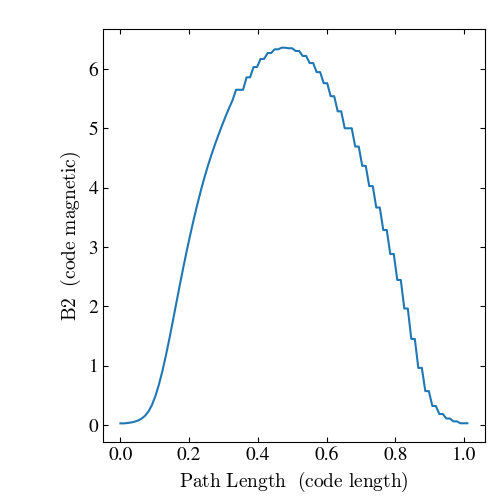

In [36]:
start_point = [0,0,1]; end_point = [0,0,2]
line_plot = yt.LinePlot(ds, ("amrvac", 'b2'), start_point, end_point, 100)
line_plot.set_log(("amrvac", 'b2'), False)
line_plot.show()

In [37]:
points = np.linspace(start_point, end_point, 400)

In [38]:
values = []
for point in points:
    value = ds.find_field_values_at_point(("amrvac", "b2"), point)
    values.append(value[0].to_value())

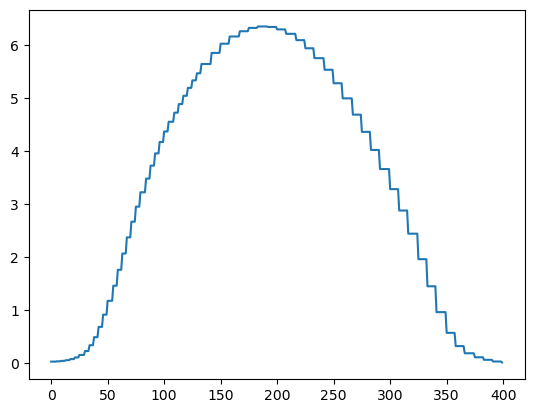

In [39]:
plt.plot(values)

In [40]:
sc1 = inspect.getsource(ds.index._find_field_values_at_points)
sc2 = inspect.getsource(ds.index._find_points)

In [41]:
dsa = ds.r[::100j,::100j,::100j]

## Read and Write of .dat file in AMRVAC format

In [42]:
import yt
import numpy as np
from typing import List, Any, Union
from yt.frontends.amrvac.datfile_utils import * #get_header, get_tree_info, get_single_block_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

datfile = r'./data/tdm0.dat'

In [43]:
# get true-false forest list of all parents and leafs blocks
def get_forest(istream, header):
    istream.seek(header["offset_tree"])
    fmt = ALIGN + (header["nleafs"] + header["nparents"]) * "i"
    return np.array(struct.unpack(fmt, istream.read(struct.calcsize(fmt))), dtype=bool)

def check_tree(fi):
    """
    Check if the tree is consistent with the header information.
    From 1. The nparents and nleafs derived from the amr levels tree is consistent with the header [From the leaf levels]
         2. The forest derived nparents and nleafs are consistent with the header [From counting the bool list]
    """

    with open(datfile, 'rb') as fi:
        header = get_header(fi)
        forest = get_forest(fi, header)
        tree   = get_tree_info(fi)

    nparents_header = header['nparents']
    nleafs_header = header['nleafs']

    tlevels = tree[0]
    level_stat = {}
    for level in tlevels:
        level_stat[level] = level_stat.get(level, 0) + 1

    nparent = 0
    nparents = 0
    nleafs_tree = len(tree[0])
    for i in range(max(tlevels), 0, -1):
        if i == 1:
            break
        nparent = (nparent + level_stat[i]) / 8
        nparents += nparent
    nparents_tree = nparents
    
    assert(nparents_tree == nparents_header)
    assert(nleafs_tree == nleafs_header)

    nleafs_forest = len(forest[forest == True])
    nparents_forest = len(forest[forest == False])

    assert(nparents_forest == nparents_header)
    assert(nleafs_forest == nleafs_header)

    return nparents_header, nleafs_header

In [44]:
with open(datfile, 'rb') as fi:
    header = get_header(fi)
    forest = get_forest(fi, header)
    tree   = get_tree_info(fi)

In [45]:
nums = check_tree(datfile)

In [46]:
def interleave_bits(ign):
    answer = 0
    ndim = len(ign)
    for i in range(0,64//ndim):  

        if ndim == 1:
            return ign[0]

        elif ndim == 2:
            bit_x = (ign[0] >> i) & 1
            bit_y = (ign[1] >> i) & 1

            answer |= (bit_x << (2*i)) | (bit_y << (2*i + 1))
        
        elif ndim == 3:
            bit_x = (ign[0] >> i) & 1
            bit_y = (ign[1] >> i) & 1
            bit_z = (ign[2] >> i) & 1

            answer |= (bit_x << (3*i)) | (bit_y << (3*i + 1)) | (bit_z << (3*i + 2))
        
    return answer

In [47]:
nglev1 = np.array([[x, y, z] for x in range(1, 7) for y in range(1, 7) for z in range(1, 7)])
morton_numbers = np.array([interleave_bits(i-1) for i in nglev1])
sorted_indices = np.argsort(morton_numbers)
sorted_nglev1 = nglev1[sorted_indices]

morton_to_grid = {morton_numbers[i]: nglev1[i] for i in range(len(morton_numbers))}

In [48]:
selected_nglev1 = np.array([[x, y, z] for x in range(1, 3) for y in range(1, 3) for z in range(1, 3)])
[np.where(np.all(nglev1 == x, axis=1))[0][0] for x in selected_nglev1]

[0, 1, 6, 7, 36, 37, 42, 43]

In [49]:
def is_incremental(lst):
    return all(x < y for x, y in zip(lst, lst[1:]))

is_incremental([interleave_bits((i-1)) for i in tree[1][tree[0] == 1]])

True

In [50]:
# extract all level 1 block grid indices from forest 
lev1_indices = [] # in forest, all lev1 indices

def read_forest(forest, j, level):

    if level == 1:
        lev1_indices.append(j)

    if forest[j]:
        return j+1
    else:
        childlevel = level + 1
        j = j + 1
        for i in range(8):
            j = read_forest(forest, j, childlevel)
        return j

j = 0
for i, grid in enumerate(nglev1):
    level = 1
    j = read_forest(forest, j, level)

In [51]:
lev1_leaf_indices = [] # in leafs, the lev1 block posiiton would be
j = 0
for i in range(len(lev1_indices)-1):
    lev1_leaf_indices.append(j)    

    lev1_ng1 = lev1_indices[i]
    lev1_ng2 = lev1_indices[i+1]
    if not forest[lev1_ng1]:
        leaf_num = np.where(forest[lev1_ng1:lev1_ng2] == True)[0].shape[0]
        j += leaf_num
    else:
        j += 1
lev1_leaf_indices.append(j)

In [52]:
# beginning 24 bit; 4 byte integer indicating the ghost cell number for each dimension min/max
# d_offset_block = 24 + block_ndim^3 * nw * 8 + (block_ndim+1)^3 * nws * 8
# 46192 = 24 + 8^3 * 8 * 7  + 9^3 * 8 * 3
offset_block_data = header['offset_blocks']
with open(datfile, 'rb') as fi:
    fi.seek(offset_block_data)
    fmt = ALIGN + 2 * header['ndim'] * "i"
    ix_buffer = np.array(struct.unpack(fmt, fi.read(struct.calcsize(fmt))))
print(ix_buffer)

[0 0 0 0 0 0]


In [53]:
def read_block_data(istream, j, header, block_offsets):
    """
    Read the jth block in morton order from the istream (in block_offsets list)
    """
    ndim = header['ndim']
    nw = header['nw']
    nws = 3
    block_size = header['block_nx']
    block_offset_j = block_offsets[j]
    n_values = np.prod(block_size) * 8 * nw + np.prod((block_size+1)) * 8 * nws
    offsets_interval = (block_offsets[1] - block_offsets[0] - ndim * 2 * 4)
    assert(n_values == offsets_interval), f"n_values: {n_values}, offsets_interval: {offsets_interval}"

    istream.seek(block_offset_j+ndim*2*4)
    fmt = ALIGN + n_values * "d"
    w_buffer = np.array(struct.unpack(fmt, istream.read(struct.calcsize(fmt))))

    return w_buffer

with open(datfile, 'rb') as fi:
    w_buffer1 = read_block_data(fi, 0, header, tree[2])

## Test Demo to cut one subregion from .dat and write to a new one

In [54]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import sys
src_path = os.path.abspath(os.path.join(os.getcwd(), '.', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)
import datfile_io
import morton_amr
datfile = r'./data/tdm0.dat'
datfile1 = r'./data/tdm1.dat'

In [55]:
with open(datfile, 'rb') as fi:
    header = datfile_io.get_header(fi)
    tree = datfile_io.get_tree_info(fi)
    forest = datfile_io.get_forest(fi)
    datfile_io.check_tree(fi)
    with open(datfile1, 'rb+') as fw:
        datfile_io.write_header(fw, header)
        header1 = datfile_io.get_header(fw)
        datfile_io.write_forest_tree(fw, forest, tree)
        tree1 = datfile_io.get_tree_info(fw)

In [56]:
with open(datfile, 'rb') as fi:
    si = datfile_io.selected_lev1_indices(fi, [2,4], [2,4], [2,4])


In [57]:
lev1_all = morton_amr.nglev1_morton([0,6], [0,6], [0,6])
lev1_selected = morton_amr.nglev1_morton([1,3], [1,3], [1,3])
j = 0
for i in lev1_selected:
    j1 = np.where(np.all(lev1_all == i, axis=1))[0][0]
    if j1 < j:
        print(j1, j) 
    j1 = j

In [58]:
lst = [morton_amr.interleave_bits(index) for index in lev1_selected]

In [59]:
np.where(np.all(lev1_all == [0,0,0], axis=1))[0][0]

0

In [60]:
with open(datfile1, 'rb+') as f1:
    header = datfile_io.get_header(f1)
    tree = datfile_io.get_tree_info(f1)
    forest = datfile_io.get_forest(f1)
    datfile_io.check_tree(f1)

In [61]:
# extracted: header, tree, forest(is leaf or parent)
nw, ndir, ndim = header['nw'], header['ndir'], header['ndim']
domain_nx = header['domain_nx']
block_nx = header['block_nx']
numblocks = np.array(domain_nx / block_nx, dtype=int)
offset_blocks = header['offset_blocks']

In [62]:
# extract all level 1 block grid indices from forest 
lev1_indices = [] # in forest, all lev1 indices; for writing the new forest bool list

def read_forest(forest, j, level):

    if level == 1:
        lev1_indices.append(j)

    if forest[j]:
        return j+1
    else:
        childlevel = level + 1
        j = j + 1
        for i in range(8):
            j = read_forest(forest, j, childlevel)
        return j

nglev1 = np.array([[x, y, z] for x in range(0, numblocks[0]) for y in range(0, numblocks[1])
                    for z in range(0, numblocks[2])])
j = 0
for i, grid in enumerate(nglev1):
    level = 1
    j = read_forest(forest, j, level)

lev1_leaf_indices = [] # in leafs, the lev1 block posiiton would be; for indicating the new tree leaf blocks sequence
j = 0
for i in range(len(lev1_indices)-1):
    lev1_leaf_indices.append(j)    

    lev1_ng1 = lev1_indices[i]
    lev1_ng2 = lev1_indices[i+1]
    if not forest[lev1_ng1]:
        leaf_num = np.where(forest[lev1_ng1:lev1_ng2] == True)[0].shape[0]
        j += leaf_num
    else:
        j += 1
lev1_leaf_indices.append(j)

In [63]:
nglev1 = np.array([[x, y, z] for x in range(0, numblocks[0]) for y in range(0, numblocks[1])
                    for z in range(0, numblocks[2])])
morton_numbers = np.array([morton_amr.interleave_bits(i) for i in nglev1])
sorted_indices = np.argsort(morton_numbers)
sorted_nglev1 = nglev1[sorted_indices]

morton_to_grid = {morton_numbers[i]: nglev1[i] for i in range(len(morton_numbers))}

In [64]:
selected_nglev1 = np.array([[x, y, z] for x in range(1, 3) for y in range(1, 3) for z in range(1, 3)])
morton_numbers_new = np.array([interleave_bits(i) for i in selected_nglev1])
sorted_selected_nglev1 = selected_nglev1[np.argsort(morton_numbers_new)]
indices_of_alllev1 = [np.where(np.all(sorted_nglev1 == x, axis=1))[0][0] for x in sorted_selected_nglev1]

In [65]:
lev1_index_forest = [lev1_indices[lev1_index] for lev1_index in indices_of_alllev1]
forest_new = []
forest_list = forest.tolist()
for i in range(len(lev1_index_forest)):
    i1 = lev1_index_forest[i]
    i_lev1_indices = lev1_indices.index(i1)
    if i_lev1_indices < len(lev1_indices)-1:
        forest_new.extend(forest_list[i1:lev1_indices[i_lev1_indices+1]])

## Test on the fill_region_float in .pyx file with modification

In [108]:
%load_ext cython
import yt
import numpy as np
import inspect
from matplotlib import pyplot as plt
from typing import List, Any, Union

datfile = r'./data/tdm0.dat'
df2 = r'./data/cell_test0000.dat'
# ds = yt.load(datfile)
ds = yt.load(df2)

yt : [WARNING  ] 2024-09-12 17:18:44,194 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-09-12 17:18:44,223 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-09-12 17:18:44,224 Parameters: domain_dimensions         = [40 40 40]
yt : [INFO     ] 2024-09-12 17:18:44,225 Parameters: domain_left_edge          = [-6. -6.  0.]
yt : [INFO     ] 2024-09-12 17:18:44,226 Parameters: domain_right_edge         = [ 6.  6. 12.]
yt : [INFO     ] 2024-09-12 17:18:44,226 Parameters: cosmological_simulation   = 0


The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [118]:
%%cython
cimport numpy as np
cimport cython
from libc.math cimport ceil

cdef inline np.int64_t imax(np.int64_t i0, np.int64_t i1) nogil:
    if i0 > i1: return i0
    return i1

cdef inline np.float64_t fmax(np.float64_t f0, np.float64_t f1) nogil:
    if f0 > f1: return f0
    return f1

cdef inline np.int64_t imin(np.int64_t i0, np.int64_t i1) nogil:
    if i0 < i1: return i0
    return i1

cdef inline np.float64_t fmin(np.float64_t f0, np.float64_t f1) nogil:
    if f0 < f1: return f0
    return f1

cdef inline _ensure_code(arr):
    if hasattr(arr, "units"):
        if "code_length" == str(arr.units):
            return arr
        arr.convert_to_units("code_length")
    return arr

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
def fill_region_float(np.ndarray[np.float64_t, ndim=2] fcoords,
                      np.ndarray[np.float64_t, ndim=2] fwidth,
                      np.ndarray[np.float64_t, ndim=1] data,
                      np.ndarray[np.float64_t, ndim=1] box_left_edge,
                      np.ndarray[np.float64_t, ndim=1] box_right_edge,
                      np.ndarray[np.float64_t, ndim=3] dest,
                      np.ndarray[np.int64_t, ndim=4] dest_log,
                      int antialias = 1,
                      period = None,
                      int check_period = 1):
    cdef np.float64_t ds_period[3]
    cdef np.float64_t box_dds[3]
    cdef np.float64_t box_idds[3]
    cdef np.float64_t width[3]
    cdef np.float64_t LE[3]
    cdef np.float64_t RE[3]
    cdef np.int64_t i, j, k, p, xi, yi
    cdef np.int64_t dims[3]
    cdef np.int64_t ld[3]
    cdef np.int64_t ud[3]

    cdef np.float64_t lb[3]
    cdef np.int64_t ipos

    cdef np.float64_t overlap[3]
    cdef np.float64_t dsp
    cdef np.float64_t osp[3]
    cdef np.float64_t odsp[3]
    cdef np.float64_t sp[3]
    cdef np.float64_t lfd[3]
    cdef np.float64_t ufd[3]

    cdef np.int64_t num_points=0
    cdef np.int64_t num_repeat=0
    # These are the temp vars we get from the arrays
    # Some periodicity helpers
    cdef int diter[3][2]
    cdef np.float64_t diterv[3][2]
    if period is not None:
        for i in range(3):
            ds_period[i] = period[i]
    else:
        ds_period[0] = ds_period[1] = ds_period[2] = 0.0
    box_left_edge = _ensure_code(box_left_edge)
    box_right_edge = _ensure_code(box_right_edge)
    _ensure_code(fcoords)
    _ensure_code(fwidth)
    for i in range(3):
        LE[i] = box_left_edge[i]
        RE[i] = box_right_edge[i]
        width[i] = RE[i] - LE[i]
        dims[i] = dest.shape[i]
        box_dds[i] = width[i] / dims[i]
        box_idds[i] = 1.0/box_dds[i]
        diter[i][0] = diter[i][1] = 0
        diterv[i][0] = diterv[i][1] = 0.0
        overlap[i] = 1.0
    for p in range(fcoords.shape[0]):
        for i in range(3):
            diter[i][1] = 999
            odsp[i] = fwidth[p,i]*0.5
            osp[i] = fcoords[p,i] # already centered
            overlap[i] = 1.0
        dsp = data[p]
        if check_period == 1:
            for i in range(3):
                if (osp[i] - odsp[i] < LE[i]):
                    diter[i][1] = +1
                    diterv[i][1] = ds_period[i]
                elif (osp[i] + odsp[i] > RE[i]):
                    diter[i][1] = -1
                    diterv[i][1] = -ds_period[i]
        for xi in range(2):
            if diter[0][xi] == 999: continue
            sp[0] = osp[0] + diterv[0][xi]
            if (sp[0] + odsp[0] < LE[0]) or (sp[0] - odsp[0] > RE[0]): continue
            for yi in range(2):
                if diter[1][yi] == 999: continue
                sp[1] = osp[1] + diterv[1][yi]
                if (sp[1] + odsp[1] < LE[1]) or (sp[1] - odsp[1] > RE[1]): continue
                for zi in range(2):
                    if diter[2][zi] == 999: continue
                    sp[2] = osp[2] + diterv[2][yi]
                    if (sp[2] + odsp[2] < LE[2]) or (sp[2] - odsp[2] > RE[2]): continue
                    for i in range(3):
                        lb[i] = (sp[i]-LE[i])*box_idds[i]-0.5

                        # NOTE: This is a different way of doing it than in the C
                        # routines.  In C, we were implicitly casting the
                        # initialization to int, but *not* the conditional, which
                        # was allowed an extra value:
                        #     for(j=lc;j<rc;j++)
                        # here, when assigning lc (double) to j (int) it got
                        # truncated, but no similar truncation was done in the
                        # comparison of j to rc (double).  So give ourselves a
                        # bonus row and bonus column here.
                        ld[i] = <np.int64_t> fmax(ceil((sp[i]-3*odsp[i]-LE[i])*box_idds[i]-0.5),0)
                        ud[i] = <np.int64_t> fmin(((sp[i]+3*odsp[i]-LE[i])*box_idds[i] + 0.5), dims[i])
                    for i in range(ld[0], ud[0]):
                        for j in range(ld[1], ud[1]):
                            for k in range(ld[2], ud[2]):
                                ipos = 0
                                dest[i,j,k] = dsp
                                if k < lb[2]:
                                    ipos += 4
                                if j < lb[1]:
                                    ipos += 2
                                if i < lb[0]:
                                    ipos += 1
                                if dest_log[i,j,k,ipos]:
                                    if fwidth[dest_log[i,j,k,ipos]-1][0] <= fwidth[p][0]:
                                        continue
                                if p == 1:
                                    print(i,j,k,ld,ud,lb)
                                dest_log[i,j,k,ipos] = p+1
                                num_points += 1

    return (num_points, num_repeat)

Content of stdout:
_cython_magic_ee86edb7fe377e02e884806b949e04f79a1e9e23.c
c:\ProgramData\Miniconda3\envs\yt_test\Lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it with #define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION
C:\Users\Administrator\.ipython\cython\_cython_magic_ee86edb7fe377e02e884806b949e04f79a1e9e23.c(6273): warning C4244: ¡°º¯Êý¡±: ´Ó¡°__pyx_t_5numpy_int64_t¡±×ª»»µ½¡°__pyx_t_5numpy_float64_t¡±£¬¿ÉÄÜ¶ªÊ§Êý¾Ý
  ÕýÔÚ´´½¨¿â C:\Users\Administrator\.ipython\cython\Users\Administrator\.ipython\cython\_cython_magic_ee86edb7fe377e02e884806b949e04f79a1e9e23.cp311-win_amd64.lib ºÍ¶ÔÏó C:\Users\Administrator\.ipython\cython\Users\Administrator\.ipython\cython\_cython_magic_ee86edb7fe377e02e884806b949e04f79a1e9e23.cp311-win_amd64.exp
ÕýÔÚÉú³É´úÂë
ÒÑÍê³É´úÂëµÄÉú³É

In [119]:
region = ds.r[::20j, ::20j, ::20j]
fields = region._determine_fields(['b2'])[0]
f = fields

fields = region._determine_fields(fields)
fields_to_get = [f for f in fields if f not in region.field_data]
fields_to_get = region._identify_dependencies(fields_to_get)

fill, gen, part, alias = region._split_fields(fields_to_get)

fields = [f for f in fields if f not in region.field_data]
# # It may be faster to adapt fill_region_float to fill multiple fields
# # instead of looping here
for field in fields:
    dest = np.zeros(region.ActiveDimensions, dtype="float64")
    dest_log = np.zeros(np.append(region.ActiveDimensions, 8), dtype="int64")
    for chunk in region._data_source.chunks(fields, "io"):
        chunk_temp = chunk

        fcoords = chunk.fcoords
        fwidth = chunk.fwidth
        cfield = chunk[field]
        le = region.left_edge
        re = region.right_edge
        dest,
        antialias = 1
        period = region.ds.domain_width
        check_period = int(any(region.ds.periodicity))

        s1 = fill_region_float(fcoords, fwidth, cfield, le, re, dest, dest_log, 1, period, check_period)
        print(s1)

0 0 0 [0, 0, 0] [1, 1, 1] [-0.2499999999999994, -0.2499999999999994, 0.25]
(64000, 0)


In [112]:
num_edge = [1 if 0 in dest_log[i,j,k] else 0 for i in range(dest_log.shape[0]) for j in range(dest_log.shape[1]) for k in range(dest_log.shape[2])]

## Test on manual read and interpolation on uniform grids

In [14]:
%load_ext autoreload
%load_ext cython
%autoreload 2

import yt
import numpy as np
import inspect
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from typing import List, Any, Union
from pympler import asizeof
import os

from src.datfile_io import *

datfile = r'./data/tdm0.dat'
ds = yt.load(datfile)

yt : [WARNING  ] 2024-09-24 15:47:14,336 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-09-24 15:47:14,393 Parameters: current_time              = 0.4
yt : [INFO     ] 2024-09-24 15:47:14,394 Parameters: domain_dimensions         = [48 48 48]
yt : [INFO     ] 2024-09-24 15:47:14,395 Parameters: domain_left_edge          = [-4. -4.  0.]
yt : [INFO     ] 2024-09-24 15:47:14,396 Parameters: domain_right_edge         = [4. 4. 8.]
yt : [INFO     ] 2024-09-24 15:47:14,397 Parameters: cosmological_simulation   = 0


In [15]:
with open(datfile, 'rb') as fi:
    header = get_header(fi)
    forest = get_forest(fi)
    tree   = get_tree_info(fi)
    lev1_forest = read_lev1_indices_from_forest(header, forest)
    lev1_tree   = read_lev1_indices_from_tree(header, forest)

In [16]:
levmax = header['levmax']
xmin = header['xmin']
xmax = header['xmax']
domain_nx = header['domain_nx']
block_nx  = header['block_nx']
nblock_nx = np.array(domain_nx / block_nx, dtype=int)
wnames = header['w_names']

leafs_index = tree[1]
leafs_level = tree[0]
block_offsets = tree[2]
leafs_index_lev1 = np.array(leafs_index/np.power(2, leafs_level[:, np.newaxis]-1))
block_center_lev1 = np.array((leafs_index-0.5)/np.power(2, leafs_level[:, np.newaxis]-1))
block_o_point = np.array((leafs_index-1.0)/np.power(2, leafs_level[:, np.newaxis]-1))

dblevel = 1.0/np.power(2, leafs_level-1) # block length in lev1 block unit of each block
dxlevel = 1.0/np.power(2, leafs_level[:, np.newaxis]-1) / block_nx # cell length in lev1 block unit of each block

point = np.array([1,1,1])
point_index_cell = (point - xmin) / ((xmax - xmin) / domain_nx)
point_index_lev1 = point_index_cell / block_nx
point_index_lev1_floor = np.array(np.floor(point_index_lev1), dtype=int)

In [6]:
import numpy as np
np.zeros((3,3,3))[[1,2,2], [1,2,2], [1,2,2]]

array([0., 0., 0.])

In [8]:
# find the lev1 block index in the tree
nglev1 = nglev1_morton([0,nblock_nx[0]], [0,nblock_nx[1]], [0,nblock_nx[2]])
nglev1_1d = np.array([interleave_bits(i) for i in nglev1])
lev1_index = np.where(nglev1_1d == interleave_bits(point_index_lev1_floor))[0][0]
lev1_start = lev1_tree[lev1_index]
lev1_end = lev1_tree[lev1_index+1]

In [9]:
def find_point_block(nglev1_1d, point_index_lev1):
    # find the lev1 block containing the point
    point_index_lev1_floor = np.array(np.floor(point_index_lev1), dtype=int)
    lev1_index = np.where(nglev1_1d == interleave_bits(point_index_lev1_floor))[0][0]
    lev1_start = lev1_tree[lev1_index]
    lev1_end = lev1_tree[lev1_index+1]

    for i in range(lev1_start, lev1_end):
        dx_cell2point = point_index_lev1 - block_o_point[i]
        if np.all(dx_cell2point<=dblevel[i]):
            return i

In [10]:
point_block_index = 0
# in the lev1 block subsequent list, find the block that contains the point
for i in range(lev1_start, lev1_end):
    dx_cell2point = point_index_lev1 - block_o_point[i]
    if np.all(dx_cell2point<=dblevel[i]) and np.all(dx_cell2point>0):
        point_block_index = i
        print(i) 

3520


In [11]:
# edge index to find cell-center indices
point_cell = (point_index_lev1 - block_o_point[point_block_index]) / (dblevel[point_block_index]/block_nx) + 0.5 
x0, y0, z0 = np.array(np.floor(point_cell), dtype=int)
assert(np.all((block_nx >= (x0, y0, z0)))), f"point_cell: {(x0, y0, z0)}, block_nx: {block_nx}"

In [12]:
def cell2block_indices(point_block_index, cell, loc):
    point_index_lev1_new = block_o_point[point_block_index] + (cell-0.5) * dxlevel[point_block_index]
    block_index_new = find_point_block(nglev1_1d, point_index_lev1_new)
    cell_new = cell.copy()
    if leafs_level[block_index_new] == leafs_level[point_block_index]:
        cell_new[loc == 1] = 1
        cell_new[loc == -1] = 8
    elif leafs_level[block_index_new] > leafs_level[point_block_index]:
        block_o0 = block_o_point[point_block_index]
        block_o1 = block_o_point[block_index_new]
        if any(loc == 0):
            mark = block_o0[loc == 0] - block_o1[loc == 0]
            cell_new[loc==0] = np.ceil(cell_new[loc==0]/2) + np.where(mark, block_nx[loc==0], 0)
    else:
        block_o0 = block_o_point[point_block_index]
        block_o1 = block_o_point[block_index_new]
        if any(loc == 0):
            mark = block_o1[loc == 0] - block_o0[loc == 0] 
            cell_new[loc==0] = (2*(cell_new[loc==0] - np.where(mark, block_nx[loc==0], 0))-1) + 0.5
            
    return (block_index_new, cell_new)


In [13]:
cells4int = np.array([(i,j,k) for i in range(x0, x0+2) for j in range(y0, y0+2) for k in range(z0, z0+2)])
values = []
for cell in cells4int:
    loc = np.zeros(3)
    mask1 = cell > block_nx 
    mask2 = cell == loc
    if any(mask1) or any(mask2):
        cell_relocated = np.where(mask1, cell-block_nx, cell)
        cell_relocated[mask2] == block_nx[mask2]
        loc = np.where(mask1, 1, loc)
        loc = np.where(mask2, -1, loc)
        print(cell2block_indices(point_block_index, cell, loc))
    # cell_relocated = np.where(mask, cell-block_nx, cell)
    # print(cell_relocated) 
        # cell_block_indices = cell2block_indices(point_block_index, cell)
    # values.append(value)

(3524, array([8, 8, 1]))
(3522, array([8, 1, 8]))
(3526, array([8, 1, 1]))
(3521, array([1, 8, 8]))
(3525, array([1, 8, 1]))
(3523, array([1, 1, 8]))
(3527, array([1, 1, 1]))


In [14]:
def get_single_block_field_data(istream, offset, block_shape, field_idx:int):
    """Retrieve field data from a grid.

    Parameters
    ----------
    istream: file descriptor (open binary file with read access)

    grid : yt.frontends.amrvac.data_structures.AMRVACGrid
        The grid from which data is to be read.
    field : str
        A field name.

    Returns
    -------
    data : np.ndarray
        A 3D array of float64 type representing grid data.

    """
    count = np.prod(block_shape)
    byte_size_field = count * 8  # size of a double

    istream.seek(offset + byte_size_field * field_idx + header['ndim']*4*2)
    data = np.fromfile(istream, "=f8", count=count)
    data.shape = block_shape[::-1] # reverse the block_nx sequence
    data = data.T                  # for fortran ordering correction
    return data

In [15]:
# load all block one field data
field = 'b1'
field_idx = wnames.index(field)
raw_b1 = np.zeros((len(block_offsets), *block_nx))

with open(datfile, 'rb') as fb:
    for i in range(len(block_offsets)):
        raw_b1[i] = get_single_block_field_data(fb, block_offsets[i], block_nx, field_idx)

In [16]:
# generate xyz mesh grids in block length unit
nx = ny = nz = 100
x = (np.arange(nx)+0.5) / nx * nblock_nx[0]
y = (np.arange(ny)+0.5) / ny * nblock_nx[1]
z = (np.arange(nz)+0.5) / nz * nblock_nx[2]
mesh = np.meshgrid(x, y, z, indexing='ij')
coordinates = np.stack(mesh, axis=-1)
points_lev1 = coordinates.reshape(-1,3)
points_lev1_floor = np.floor(points_lev1).astype(int)

In [17]:
%%cython
# bit_interleave.pyx
from libc.stdint cimport uint64_t
import numpy as np
cimport numpy as np

cdef int interleave_bits(np.ndarray[np.int32_t, ndim=1] ign):
    cdef np.int64_t answer = 0
    cdef int ndim = len(ign)
    cdef int i
    cdef np.int64_t bit_x, bit_y, bit_z
    
    for i in range(0, 64 // ndim):
        if ndim == 1:
            return ign[0]

        elif ndim == 2:
            bit_x = (ign[0] >> i) & 1
            bit_y = (ign[1] >> i) & 1

            answer |= (bit_x << (2 * i)) | (bit_y << (2 * i + 1))

        elif ndim == 3:
            bit_x = (ign[0] >> i) & 1
            bit_y = (ign[1] >> i) & 1
            bit_z = (ign[2] >> i) & 1

            answer |= (bit_x << (3 * i)) | (bit_y << (3 * i + 1)) | (bit_z << (3 * i + 2))

    return answer

def find_lev1_block_idx(np.ndarray[np.int32_t, ndim=2] points_lev1, np.ndarray[np.int32_t, ndim=1] nglev1_1d):
    return np.array([np.where(nglev1_1d == interleave_bits(point_lev1))[0][0] for point_lev1 in points_lev1])

In [20]:
lookup_lev1 = {tuple(nglev1[i]): i for i in range(nglev1.shape[0])}

In [28]:
# simple test of the function totally written in simple python
from line_profiler import LineProfiler
def test_func():
    point_value = np.zeros(nx*ny*nz)
    # fill the uniform grid with nearest cell
    # first try one point situation
    for pi in range(coordinates.reshape(-1,3).shape[0]):

    # point = np.array([1,1,3])
    # dspoint = ds.point(point)
    # point_lev1 = (point-xmin) / (xmax-xmin) * nblock_nx

        point_lev1 = coordinates.reshape(-1,3)[pi]
        point_lev1_floor = np.array(np.floor(point_lev1), dtype=int)

        block_lev1_index = block_lev1_idx[pi]
        start_tree = lev1_tree[block_lev1_index]
        if block_lev1_index == len(lev1_tree)-1:
            end_tree = lev1_tree[-1]
        else:
            end_tree = lev1_tree[block_lev1_index+1]-1

        block_lev1 = 0
        for i in range(start_tree, end_tree+1):
            dx_point2origin = point_lev1 - block_o_point[i]
            if np.all(dx_point2origin <= dblevel[i]) and np.all(dx_point2origin >= 0):
                block_lev1 = i
                break

        point_cell = (point_lev1 - block_o_point[block_lev1]) / (dblevel[block_lev1]/block_nx)
        point_cell_floor = np.floor((point_lev1 - block_o_point[block_lev1]) / (dblevel[block_lev1]/block_nx)).astype(int)
        point_cell_floor[point_cell_floor == block_nx] -= 1

        # dspoint = ds.point(point_lev1*(xmax-xmin)/nblock_nx+xmin)
        # b1_ds = dspoint['b1'].value[0]

        # if (b1_ds - raw_b1[block_lev1][*point_cell_floor]):
        #     print("NOT!")

        point_value[pi] = raw_b1[block_lev1][*point_cell_floor]

        # for i in range(len(raw_b1[block_lev1].flatten())):
        #     if abs(raw_b1[block_lev1].flatten()[i]-b1_ds)<1e-6:
        #         print(f"true index from ds: {trans123(i, block_nx)}")
        # print("\n")

In [29]:
profiler = LineProfiler()
profiler.add_function(test_func)
profiler.run('test_func()')
profiler.print_stats()

Timer unit: 1e-07 s

Total time: 266.338 s

Could not find file C:\Users\Administrator\AppData\Local\Temp\ipykernel_10476\792172352.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           
     3         1        260.0    260.0      0.0  
     4                                           
     5                                           
     6   1000001    3667154.0      3.7      0.1  
     7                                           
     8                                           
     9                                           
    10                                           
    11                                           
    12   1000000   12692532.0     12.7      0.5  
    13   1000000   23458896.0     23.5      0.9  
    14                                           
    15   

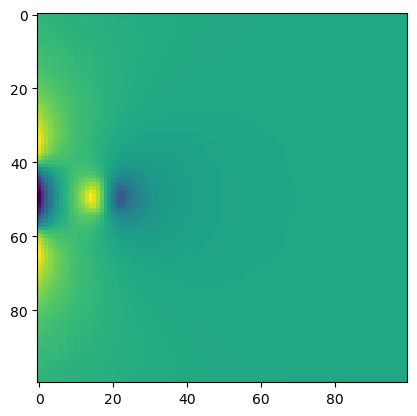

In [27]:
plt.imshow(point_value.reshape((nx,ny,nz))[:,50,:])

## Test on funcstions of mesh for uniform sampling

In [8]:
%load_ext autoreload
%load_ext cython
%autoreload 2

import sys
import yt
import numpy as np
import inspect
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from src.amr_mesh import *

datfile = r'./data/tdm0.dat'
ds = yt.load(datfile)

yt : [WARNING  ] 2024-09-25 14:37:00,234 'staggered' flag was found, but is currently ignored (unsupported)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The cython extension is already loaded. To reload it, use:
  %reload_ext cython


yt : [INFO     ] 2024-09-25 14:37:00,268 Parameters: current_time              = 0.4
yt : [INFO     ] 2024-09-25 14:37:00,268 Parameters: domain_dimensions         = [48 48 48]
yt : [INFO     ] 2024-09-25 14:37:00,269 Parameters: domain_left_edge          = [-4. -4.  0.]
yt : [INFO     ] 2024-09-25 14:37:00,271 Parameters: domain_right_edge         = [4. 4. 8.]
yt : [INFO     ] 2024-09-25 14:37:00,271 Parameters: cosmological_simulation   = 0


In [3]:
def central_difference(array, axis, delta):
    return (np.roll(array, -1, axis) - np.roll(array, 1, axis)) / (2*delta)

dx = 8 / 100

def curl_b(b1, b2, b3):
    curl_x = central_difference(b3, 1, dx) - central_difference(b2, 2, dx)
    curl_y = central_difference(b1, 2, dx) - central_difference(b3, 0, dx)
    curl_z = central_difference(b2, 0, dx) - central_difference(b1, 1, dx)
    return np.array([curl_x, curl_y, curl_z])

def div_b(b1, b2, b3):
    return central_difference(b1, 0, dx) + central_difference(b2, 1, dx) + central_difference(b3, 2, dx)

In [27]:
am1 = AMRMesh(datfile)
um1 = UniformMesh(am1, [-4,4,-4,4,0,8], [50,50,50])

In [24]:
um1.leaf_indices

array([   0,    0,    0, ..., 5073, 5073, 5073])

In [28]:
args = um1.surrounding_cells

In [40]:
for i, coord in enumerate(um1.coordinates):

    cells = um1.surrounding_cells[i][:8, :3]
    leaf_indices = um1.surrounding_cells[i][:8, 3].astype(int)
    leaf_idx_coord = um1.leaf_indices[i]
    factors = um1.surrounding_cells[i][8, :3]

    dcells = []
    flag = False
    for cell, leaf_idx in zip(cells, leaf_indices):
        if any(coord < um1.am.dblevel[leaf_idx]/2):
            pass
        
        cell_lev1 = um1.am.block_origin_lev1[leaf_idx] + (cell-0.5) * um1.am.dblevel[leaf_idx] / um1.am.block_nx

        dcell = (coord - cell_lev1) / um1.am.dblevel[leaf_idx_coord] * um1.am.block_nx
        dcells.append(dcell)
        for i in range(3):
            if ~(abs(dcell[i]) == factors[i] or abs(dcell[i]) == 1-factors[i]): 
                flag = True
        
    if flag:
        print(cells, leaf_indices, leaf_idx_coord, dcells, factors)

[[8. 1. 1.]
 [8. 1. 1.]
 [8. 1. 1.]
 [8. 1. 1.]
 [1. 1. 1.]
 [1. 1. 2.]
 [1. 2. 1.]
 [1. 2. 2.]] [0 0 0 0 1 1 1 1] 1 [array([ 0.66, -0.02, -0.02]), array([ 0.66, -0.02, -0.02]), array([ 0.66, -0.02, -0.02]), array([ 0.66, -0.02, -0.02]), array([-0.18,  0.46,  0.46]), array([-0.18,  0.46, -0.54]), array([-0.18, -0.54,  0.46]), array([-0.18, -0.54, -0.54])] [0.82 0.46 0.46]
[[8. 1. 2.]
 [8. 1. 2.]
 [8. 1. 2.]
 [8. 1. 2.]
 [1. 1. 3.]
 [1. 1. 4.]
 [1. 2. 3.]
 [1. 2. 4.]] [0 0 0 0 1 1 1 1] 1 [array([ 0.66, -0.02, -0.06]), array([ 0.66, -0.02, -0.06]), array([ 0.66, -0.02, -0.06]), array([ 0.66, -0.02, -0.06]), array([-0.18,  0.46,  0.38]), array([-0.18,  0.46, -0.62]), array([-0.18, -0.54,  0.38]), array([-0.18, -0.54, -0.62])] [0.82 0.46 0.38]
[[8. 1. 3.]
 [8. 1. 3.]
 [8. 1. 3.]
 [8. 1. 3.]
 [1. 1. 5.]
 [1. 1. 6.]
 [1. 2. 5.]
 [1. 2. 6.]] [0 0 0 0 1 1 1 1] 1 [array([ 0.66, -0.02, -0.1 ]), array([ 0.66, -0.02, -0.1 ]), array([ 0.66, -0.02, -0.1 ]), array([ 0.66, -0.02, -0.1 ]), array([-0.18

In [44]:
um1.am.block_origin_lev1[4701] + 7 * um1.am.dblevel[4701] / um1.am.block_nx

array([4.9375, 3.4375, 2.9375])

In [28]:
%%cython
import numpy as np
cimport numpy as np

# the leaf_origin_lev1, leaf_end_lev1 are already sliced by lev1 index of the point
cdef int find_leaf_idx(np.ndarray[np.float64_t, ndim=1] point,
                  np.ndarray[np.float64_t, ndim=2] leaf_origin_lev1,
                  np.ndarray[np.float64_t, ndim=2] leaf_end_lev1):

    return np.argmax(np.all((point[np.newaxis, :] >= leaf_origin_lev1) &
           (point[np.newaxis, :] <= leaf_end_lev1), axis=-1))

def find_cell_from_another_block(np.int32_t level_diff, 
                                 np.ndarray[np.float64_t, ndim=1] ddblevel,
                                 np.ndarray[np.int32_t, ndim=1] cell, 
                                 np.ndarray[np.int32_t, ndim=1] loc, 
                                 np.ndarray[np.int32_t, ndim=1] block_nx):

    cdef np.ndarray[np.float64_t, ndim=1] cell_new = (cell.copy()).astype(float)

    # note the cell varies from 0 to 9, 1-8 are the indices of internal cells
    if level_diff == 0:
        cell_new[loc == 1] = 1
        cell_new[loc == -1] = block_nx[loc == -1]

    # finer to coaser situation, find the nearest cell
    elif level_diff == -1:
        if any(loc == 0):
            cell_new[loc == 0] = np.ceil(cell_new[loc==0]/2) + np.where(ddblevel[loc==0], block_nx[loc==0]/2, 0)
        cell_new[loc == 1] = 1
        cell_new[loc == -1] = block_nx[loc == -1]
    
    # coaser to finer situation, trilinear interpolation from the nearest 8 cells
    else:
        if any(loc == 0):
            cell_new[loc == 0] = (2*(cell_new[loc == 0] - np.where(ddblevel[loc == 0], block_nx[loc==0]/2, 0))-1) + 0.5

        cell_new[loc == 1] = 1.5
        cell_new[loc == -1] = block_nx[loc == -1] - 0.5
    return cell_new

def find_surrounding_cells(np.ndarray[np.float64_t, ndim=2] points,
                           np.ndarray[np.int32_t, ndim=1] leaf_indices,
                           np.ndarray[np.int32_t, ndim=2] nearest_cells,
                           np.ndarray[np.int32_t, ndim=1] block_nx,
                           np.ndarray[np.float64_t, ndim=2] leaf_origin_lev1,
                           np.ndarray[np.float64_t, ndim=1] leaf_dblevel_lev1,
                           dict lookup_lev1, 
                           np.ndarray[np.int32_t, ndim=1] lev1_idx_tree,
                           np.ndarray[np.float64_t, ndim=3] surrounding_cells): 

    cdef np.ndarray[np.float64_t, ndim=1] point, cell_lev1, dblock
    cdef np.ndarray[np.int32_t, ndim=1] cell_lev1_idx
    cdef np.int64_t leaf_idx, leaf_idx_new
    cdef np.int32_t x0, y0, z0, level_diff
    cdef np.ndarray[np.int32_t, ndim=2] cells
    cdef np.int64_t start_idx, end_idx, count
    cdef np.int64_t block_index_lev1_new

    cdef np.ndarray[np.npy_bool, ndim=1] mask1, mask2
    cdef np.ndarray[np.int32_t, ndim=1] loc
    cdef np.ndarray[np.float64_t, ndim=1] cell_new

    for i, point in enumerate(points):

        leaf_idx = leaf_indices[i]
        x0, y0, z0 = nearest_cells[i]

        cells = np.array([[i,j,k] for i in range(x0, x0+2) for j in range(y0, y0+2) for k in range(z0, z0+2)]).astype(int)

        count = 0
        for cell in cells:

            assert(np.all(cell >= 0) and np.all(cell <= block_nx+1)), f"Cell out of bounds: {cell}"

            # loc to indicate in which side the cell beyond the block; -1 means minus, 0 means inside; 1 means plus
            loc = np.zeros(3).astype(int)
            # mask1 to show plus situation; mask2 to show minus situation; loc here only serves as np.zeros(3)
            mask1 = (cell > block_nx)
            mask2 = (cell == loc)

            # cell in lev1 length unit
            cell_lev1 = leaf_origin_lev1[leaf_idx] + (cell-0.5) * leaf_dblevel_lev1[leaf_idx] / block_nx

            # if outside, just use the nearest cell: at least one cell inside the original leaf block
            if any(cell_lev1 < 0) or any(cell_lev1 > max(lookup_lev1.keys())):
                leaf_idx_new = leaf_idx
                for cell1 in cells:
                    if any(cell1 <= 0) or any(cell1 > block_nx):
                        continue
                    cell_new = cell1.copy().astype(float)
            
            elif any(mask1) or any(mask2):

                # project mask to loc
                loc = np.where(mask1, 1, loc)
                loc = np.where(mask2, -1, loc)

                # find cell lev1 block index in lev1 list
                cell_lev1_idx = np.floor(cell_lev1).astype(int)
                # modify the max edge situation
                block_index_lev1_new = lookup_lev1[tuple(cell_lev1_idx)]

                # find the leaf index of cell
                start_idx = lev1_idx_tree[block_index_lev1_new]
                end_idx = lev1_idx_tree[block_index_lev1_new + 1]-1 \
                    if (block_index_lev1_new < len(lev1_idx_tree)-1) else len(leaf_origin_lev1)-1

                if start_idx == end_idx:
                    leaf_idx_new = start_idx
                else:
                    leaf_idx_new = find_leaf_idx(cell_lev1, leaf_origin_lev1[start_idx:end_idx+1], 
                        leaf_origin_lev1[start_idx:end_idx+1]+leaf_dblevel_lev1[start_idx:end_idx+1][:,np.newaxis]) \
                        + start_idx

                # assert(np.all(leaf_origin_lev1[leaf_idx_new] <= cell_lev1) and \
                #        np.all(cell_lev1 <= leaf_origin_lev1[leaf_idx_new]+leaf_dblevel_lev1[leaf_idx_new])), \
                #        f"Cell out of bounds: {cell_lev1}, {cell_lev1_idx}, {leaf_origin_lev1[leaf_idx_new]}, {leaf_dblevel_lev1[leaf_idx_new]}"

                
                # eval the level_diff situation
                if leaf_dblevel_lev1[leaf_idx_new] < leaf_dblevel_lev1[leaf_idx]:
                    level_diff = 1
                elif leaf_dblevel_lev1[leaf_idx_new] > leaf_dblevel_lev1[leaf_idx]:
                    level_diff = -1
                else:
                    level_diff = 0
                dblock = leaf_origin_lev1[leaf_idx_new] - leaf_origin_lev1[leaf_idx]
                # find the new cell 
                cell_new = find_cell_from_another_block(level_diff, dblock, cell, loc, block_nx)
                
            else:
                 leaf_idx_new = leaf_idx
                 cell_new = cell.astype(float)
            if count == 0:
                surrounding_cells[i,-1,:3] = (point-cell_lev1) / leaf_dblevel_lev1[leaf_idx] * block_nx
                
            surrounding_cells[i, count, :3] = cell_new
            surrounding_cells[i, count, 3] = leaf_idx_new

            count += 1
        
        assert(count == 8), f"Count is not 8: {count}"


In [29]:
find_surrounding_cells(*args)

In [19]:
b1 = um1['b1'].reshape(um1.nx)
b2 = um1['b2'].reshape(um1.nx)
b3 = um1['b3'].reshape(um1.nx)

In [20]:
j = curl_b(b1, b2, b3)
absj = np.linalg.norm(j, axis=0)
divb = div_b(b1, b2, b3)

In [1]:
plt.imshow(b2[:,50,:], norm=LogNorm())

NameError: name 'plt' is not defined

In [12]:
rg = ds.r[::50j, ::50j, ::50j]
b1s = rg['b1']
b2s = rg['b2']
b3s = rg['b3']
js = curl_b(b1s, b2s, b3s)
absjs = np.linalg.norm(js, axis=0)
divb = div_b(b1s, b2s, b3s)

yt : [WARNING  ] 2024-09-25 11:36:17,136 e not found and no parfile passed, can not set thermal_pressure.


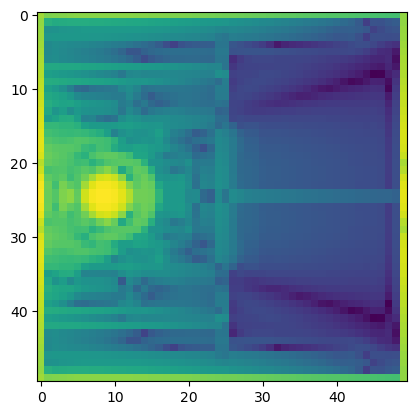

In [15]:
from matplotlib.colors import LogNorm, PowerNorm

plt.imshow(absjs[:,25,:], norm=LogNorm())

## Test on Lev1 Grid Read and Transform to uniform grids

In [102]:
from src.datfile_io import *
import yt
import matplotlib.pyplot as plt
ufile = r'./data/ulev1.dat'
ds = yt.load(ufile)

yt : [WARNING  ] 2024-10-22 19:48:52,195 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-10-22 19:48:52,225 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-10-22 19:48:52,226 Parameters: domain_dimensions         = [40 40 40]
yt : [INFO     ] 2024-10-22 19:48:52,226 Parameters: domain_left_edge          = [-6. -6.  0.]
yt : [INFO     ] 2024-10-22 19:48:52,227 Parameters: domain_right_edge         = [ 6.  6. 12.]
yt : [INFO     ] 2024-10-22 19:48:52,228 Parameters: cosmological_simulation   = 0


In [103]:
with open(ufile, 'rb+') as uf:
    header = get_header(uf)
    tree = get_tree_info(uf)

In [112]:
header

{'datfile_version': 5,
 'offset_tree': 320,
 'offset_blocks': 544,
 'nw': 7,
 'ndir': 3,
 'ndim': 3,
 'levmax': 1,
 'nleafs': 8,
 'nparents': 0,
 'it': 0,
 'time': 0.0,
 'xmin': array([-6., -6.,  0.]),
 'xmax': array([ 6.,  6., 12.]),
 'domain_nx': array([40, 40, 40]),
 'block_nx': array([20, 20, 20]),
 'periodic': array([False, False, False]),
 'geometry': 'Cartesian_3D',
 'staggered': True,
 'w_names': ['rho', 'm1', 'm2', 'm3', 'b1', 'b2', 'b3'],
 'physics_type': 'mhd',
 'n_par': 1,
 'params': array([1.]),
 'param_names': ['gamma'],
 'snapshotnext': 1,
 'slicenext': 0,
 'collapsenext': 0}

In [104]:
domain_nx = header['domain_nx']
block_nx = header['block_nx']
nblock_nx = (header['domain_nx'] / header['block_nx']).astype(np.int32)
nleafs = header['nleafs']
field = np.zeros(domain_nx)

In [117]:
with open(ufile, 'rb+') as uf:
    for i in range(nleafs):
        block_idx = tree[1][i]
        offset = tree[2][i]

        x0, y0, z0 = (block_idx-1) * block_nx
        x1, y1, z1 = block_idx * block_nx
        data = get_single_block_field_data(uf, offset, block_nx, 3, 6)
        field[x0:x1, y0:y1, z0:z1] = data

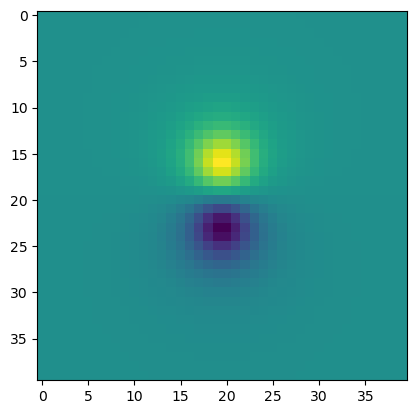

In [118]:
plt.imshow(field[:,:,1])